# Hypothesis Testing

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as sc

In [21]:
dataset=pd.read_csv("sales_data.csv")

In [22]:
dataset

,User_ID,Product_ID,Gender,Age,Occupation,City,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,Hyderabad,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,Hyderabad,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,Hyderabad,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,Hyderabad,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,Chennai,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,Bangalore,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,Chennai,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,Bangalore,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,Chennai,2,0,20,NaN,NaN,365


# Steps Hypothesis Test

1. State you null hypothesis
2. Alternate hypothesis
3. Choose Significance Level

1. Null Hypothesis Ho or H0 : ABC company has customers more than 42 % in Banglore 
2. Alternate Hypothesis Ha or H1 : ABC company has customers less than 42 % in Banglore

3. Confidence Level --95% P Value or Significance Level =0.05

4. Null Hypothesis -- p(Banglore>0.42)
5. Alternate  Hypothesis -p(Banglore<0.42) p(Banglore>0.42)

# One Sample Propotion Z Test
z= (P^-Po)/sqrt(Po(1-Po)/n)

P^ -- Sample Data Propotion

Po -- Assumption -- Proportion from statement

n -- Sample Size

In [6]:
dataset["City"]

0         Hyderabad
1         Hyderabad
2         Hyderabad
3         Hyderabad
4           Chennai
            ...    
550063    Bangalore
550064      Chennai
550065    Bangalore
550066      Chennai
550067    Bangalore
Name: City, Length: 550068, dtype: object

In [7]:
import random

In [8]:
#Sample Size
n=100

In [9]:
sample_data=pd.Series(random.choices(dataset["City"],k=n))

In [10]:
sample_prop=sample_data.value_counts()/sample_data.value_counts().sum()

In [11]:
sample_prop

Bangalore    0.44
Hyderabad    0.31
Chennai      0.25
dtype: float64

In [12]:
bang_prop=sample_prop["Bangalore"]

In [13]:
#z= (P^-Po)/sqrt(Po(1-Po)/n)
z=(bang_prop-0.42)/np.sqrt((0.42*(1-0.42))/n)

In [14]:
z

0.4052204492365542

In [15]:
if(z<-1.96 or z>1.96):
    print("Reject the null hypothesis")
else:
    print("Accept the null hypothesis")

Accept the null hypothesis


In [16]:
import scipy.stats as sc

In [17]:
sc.norm.sf(z)

0.34265773743908984

 1. We can significantly conclude that ABC company has customers more than 42 % in Banglore

# Chi Square Test

In [ ]:
dataset.head()

 1. Null Hypothesis Ho or H0 :There is no relationship between gender and City
 2. Alternate Hypothesis Ha or H1 : There is relationship between gender and City

In [ ]:
data_sample=dataset.sample(100)#Draw sample from dataframe

In [ ]:
data_sample

In [ ]:
#Observer Values--Sample Values
pd.crosstab(data_sample["Gender"],data_sample["City"],margins=True,margins_name="Total")

In [ ]:
observed_values=pd.crosstab(data_sample["Gender"],data_sample["City"])

In [ ]:
observed_values

In [ ]:
observed_values=observed_values.values

In [ ]:
pd.crosstab(data_sample["Gender"],data_sample["City"],margins=True,margins_name="Total")

In [ ]:
import scipy.stats as s

In [ ]:
observed_values

In [ ]:
#Expected Values
s.chi2_contingency(observed_values)[3]

In [ ]:
#1-Chi Square Value
#2-P value
#3-DOF-Degree Of Freedom
#4-Expeceted Values
chi_calculated,p,dof,expect=s.chi2_contingency(observed_values)

In [ ]:
p

In [ ]:
chi_calculated

In [ ]:
chi_tabular=5.99

In [ ]:
if(chi_calculated<chi_tabular):
    print("Accept the null Hypothesis")
elif(chi_calculated>chi_tabular):
    print("Reject the null hypothesis")
    

1. Significantly conclude and proved  that There is no relationship between gender and City

1. Null Hypothesis Ho or H0 : On average customers purchased with the amount of 9200
2. Alternate Hypothesis Ha or H1 : On average customers purchased with the amount of more a or less 9200

In [46]:
pmean=dataset['Purchase'].mean()

In [47]:
dataset['Purchase'].describecribe()

count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64

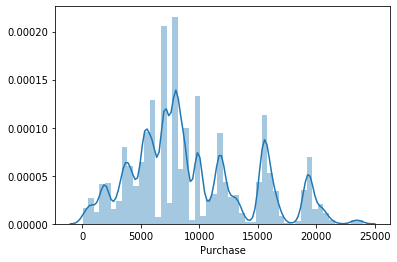

In [23]:
sns.distplot(dataset.Purchase)

In [38]:
no=1000
k1=30
purchase_sample=[]
mean_sample=[]

In [39]:
for i in range(no):
    purchase_sample.append(random.choices(dataset.Purchase,k=k1))

In [40]:
for i in purchase_sample:
    mean_sample.append(np.mean(i))
    

In [44]:
smean=np.mean(mean_sample)

In [50]:
z=(smean-9200)/(5023/np.sqrt(1000))

In [51]:
z

0.396933524003623